<a href="https://colab.research.google.com/github/vineelach7/Spam-mgs-detection-using-machine-learning/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [168]:
# Load dataset
data = pd.read_csv('/content/spam.csv', encoding='latin-1')
data = data.rename(columns={'v1': 'label', 'v2': 'message'})
data = data[['label', 'message']]
data['label'] = data['label'].map({'ham': 0, 'spam': 1})


In [169]:
# Preprocessing steps
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [170]:
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [171]:
# Apply preprocessing
data['cleaned_message'] = data['message'].apply(preprocess_text)

In [172]:
# Data preprocessing
data['message_length'] = data['message'].apply(len)
data['word_count'] = data['message'].apply(lambda x: len(x.split()))

In [173]:
# Output for preprocessing steps
print("Before Preprocessing:\n", data['message'].head())
print("\nAfter Preprocessing:\n", data['cleaned_message'].head())

Before Preprocessing:
 0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

After Preprocessing:
 0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry wkly comp win fa cup final tkts st ...
3                  u dun say early hor u c already say
4             nah dont think go usf life around though
Name: cleaned_message, dtype: object


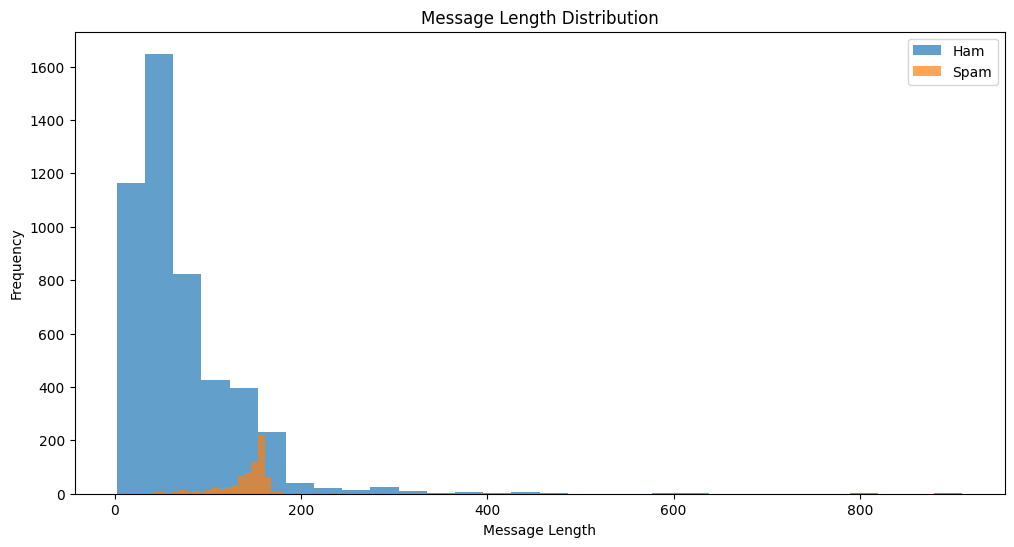

In [174]:
#Message Length Distribution
plt.figure(figsize=(12, 6))
plt.hist(data[data['label'] == 0]['message_length'], bins=30, alpha=0.7, label='Ham')
plt.hist(data[data['label'] == 1]['message_length'], bins=30, alpha=0.7, label='Spam')
plt.title('Message Length Distribution')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

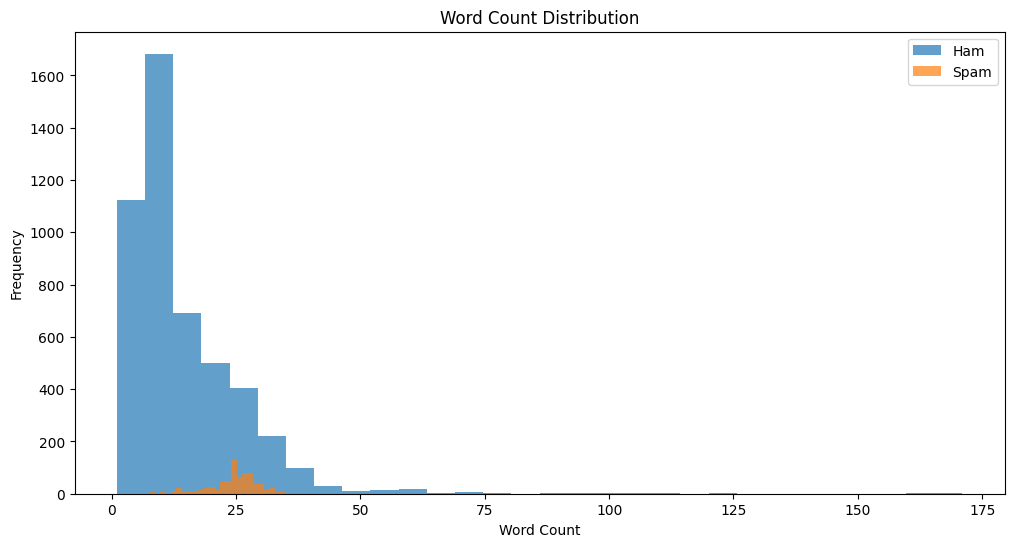

In [175]:
#Word Count Distribution
plt.figure(figsize=(12, 6))
plt.hist(data[data['label'] == 0]['word_count'], bins=30, alpha=0.7, label='Ham')
plt.hist(data[data['label'] == 1]['word_count'], bins=30, alpha=0.7, label='Spam')
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [176]:
# Preprocess the data
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
X = tfidf.fit_transform(data['message'])
y = data['label']

In [177]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [178]:
models = {
    'SVC': nb_model,
}


In [180]:
# Train Naive Bayes
nb_model = SVC()
nb_model.fit(X_train, y_train)


SVC()

In [185]:
# Train and evaluate model
performance = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    performance.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

In [186]:
# Predict and evaluate
nb_y_pred = nb_model.predict(X_test)
print("Support vector machine Performance:")
print("Accuracy:", accuracy_score(y_test, nb_y_pred))
print("Precision:", precision_score(y_test, nb_y_pred))
print("Recall:", recall_score(y_test, nb_y_pred))
print("F1 Score:", f1_score(y_test, nb_y_pred))

Support vector machine Performance:
Accuracy: 0.9802631578947368
Precision: 0.9897435897435898
Recall: 0.8616071428571429
F1 Score: 0.9212410501193318


In [187]:
# Predict new messages
def predict_message(message, model_name='SVC'):
    model = models[model_name] # Access the model from the 'models' dictionary
    transformed_message = tfidf.transform([message])
    prediction = model.predict(transformed_message)[0]
    return 'Spam' if prediction == 1 else 'Ham'

In [188]:
# Example of preprocessing a spam message
spam_example = "Congratulations! You've won a $1,000 Walmart gift card. Go to www.walmart.com to claim now!"
preprocessed_spam_example = preprocess_text(spam_example)

print("Original Spam Message:")
print(spam_example)
print("\nPreprocessed Spam Message:")
print(preprocessed_spam_example)

# Predict the label for the example message
predicted_label = predict_message(spam_example)
print("\nPrediction for Spam Example:")
print(f"Message: {spam_example}\nPrediction: {predicted_label}")


Original Spam Message:
Congratulations! You've won a $1,000 Walmart gift card. Go to www.walmart.com to claim now!

Preprocessed Spam Message:
congratulation youve walmart gift card go wwwwalmartcom claim

Prediction for Spam Example:
Message: Congratulations! You've won a $1,000 Walmart gift card. Go to www.walmart.com to claim now!
Prediction: Spam


In [189]:
# Example of a non-spam message
non_spam_example = "Hey, are we still on for the meeting tomorrow at 10 AM?"

# Preprocess the example
preprocessed_non_spam_example = preprocess_text(non_spam_example)

# Display preprocessing steps
print("Original Non-Spam Message:")
print(non_spam_example)
print("\nPreprocessed Non-Spam Message:")
print(preprocessed_non_spam_example)

# Predict the label for the non-spam message
predicted_non_spam_label = predict_message(non_spam_example)

# Display prediction
print("\nPrediction for Non-Spam Example:")
print(f"Message: {non_spam_example}\nPrediction: {predicted_non_spam_label}")


Original Non-Spam Message:
Hey, are we still on for the meeting tomorrow at 10 AM?

Preprocessed Non-Spam Message:
hey still meeting tomorrow

Prediction for Non-Spam Example:
Message: Hey, are we still on for the meeting tomorrow at 10 AM?
Prediction: Ham
